In [1]:
from GA import solve
from TSP import compute_distance_matrix, visualize
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

file_path = '../data/5_CentralRegion.csv'

In [3]:
locations = pd.read_csv(file_path, header=None).values
locations 

array([['province', 'lat', 'lon'],
       ['Thanh Hóa', '19.9781573', '105.4816107'],
       ['Nghệ An', '19.1976001', '105.0606760'],
       ['Hà Tĩnh', '18.3504832', '105.7623047'],
       ['Quảng Bình', '17.5095990', '106.4004452'],
       ['Quảng Trị', '16.7897806', '106.9797431'],
       ['Thừa Thiên Huế', '16.4639321', '107.5863388'],
       ['Quảng Nam', '15.5761698', '108.0527132'],
       ['Quảng Ngãi', '14.9953739', '108.6917290'],
       ['Bình Định', '14.0779378', '108.9898798'],
       ['Phú Yên', '13.1912633', '109.1273678'],
       ['Khánh Hòa', '12.2980751', '108.9950386'],
       ['Ninh Thuận', '11.6965639', '108.8928476'],
       ['Bình Thuận', '11.1041572', '108.1832931'],
       ['Kon Tum', '14.6995372', '107.9323831'],
       ['Gia Lai', '13.8177445', '108.2004015'],
       ['Đắk Lắk', '12.8292274', '108.2999058'],
       ['Đắk Nông', '12.2818851', '107.7302484'],
       ['Lâm Đồng', '11.6614957', '108.1335279'],
       ['Đà Nẵng', '16.0680000', '108.2120000']], dt

In [4]:
locations_numeric = locations[1:, 1:].astype(float)

distance_matrix = compute_distance_matrix(locations_numeric)

In [ ]:
# Danh sách các thuật toán
mutation_algorithms = ['swap', 'scramble', 'inversion', 'insertion']
crossover_algorithms = ['order', 'single_point', 'two_point', 'uniform']
selection_algorithms = ['elitism', 'tournament', 'rank', 'roulette_wheel']

In [ ]:
from sklearn.metrics import auc
import numpy as np
import matplotlib.pyplot as plt

def plot_fitness_grid(distance_matrix):
    results = []

    # 1. Chạy tất cả tổ hợp và tính FIR và AUC
    for mutation in mutation_algorithms:
        for crossover in crossover_algorithms:
            for selection in selection_algorithms:
                best_distance, best_route, fitness_history = solve(
                    distance_matrix,
                    population_size=100,
                    generations=200,
                    mutation_rate=0.02,
                    mutation_algorithm=mutation,
                    crossover_algorithm=crossover,
                    selection_algorithm=selection
                )

                fir = (fitness_history[0] - fitness_history[-1]) / len(fitness_history)

                # Tính AUC (Area Under Curve)
                x = np.arange(len(fitness_history))
                y = fitness_history
                area = auc(x, y)

                results.append({
                    'mutation': mutation,
                    'crossover': crossover,
                    'selection': selection,
                    'fitness_history': fitness_history,
                    'fir': fir,
                    'auc': area
                })

    # 2. Sắp xếp theo FIR giảm dần
    results.sort(key=lambda x: x['auc'])

    # 3. Vẽ biểu đồ
    fig, axes = plt.subplots(11, 6, figsize=(18, 33))
    fig.subplots_adjust(hspace=0.7)

    for index, result in enumerate(results):
        row = index // 6
        col = index % 6
        ax = axes[row][col]

        ax.plot(result['fitness_history'])
        ax.set_title(
            f"mut: {result['mutation']}, cross: {result['crossover']}, sel: {result['selection']}",
            fontsize=8
        )
        ax.tick_params(axis='x', labelsize=11)
        ax.tick_params(axis='y', labelsize=11)

        # Vẽ chỉ số FIR và AUC
        ax.text(
            0.95, 0.78,
            f"AUC: {result['auc']:.1f}",
            transform=ax.transAxes,
            ha='right',
            va='bottom',
            fontsize=11,
            color='blue',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.6)
        )

        color = 'green' if result['fir'] >= 0.05 else 'red'
        ax.text(
            0.95, 0.68,
            f"FIR: {result['fir']:.3f}",
            transform=ax.transAxes,
            ha='right',
            va='bottom',
            fontsize=11,
            color=color,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.6)
        )
        
    # 4. Tắt các ô thừa (66 - 64 = 2)
    for i in range(len(results), 66):
        row = i // 6
        col = i % 6
        fig.delaxes(axes[row][col])

    plt.tight_layout()
    plt.show()


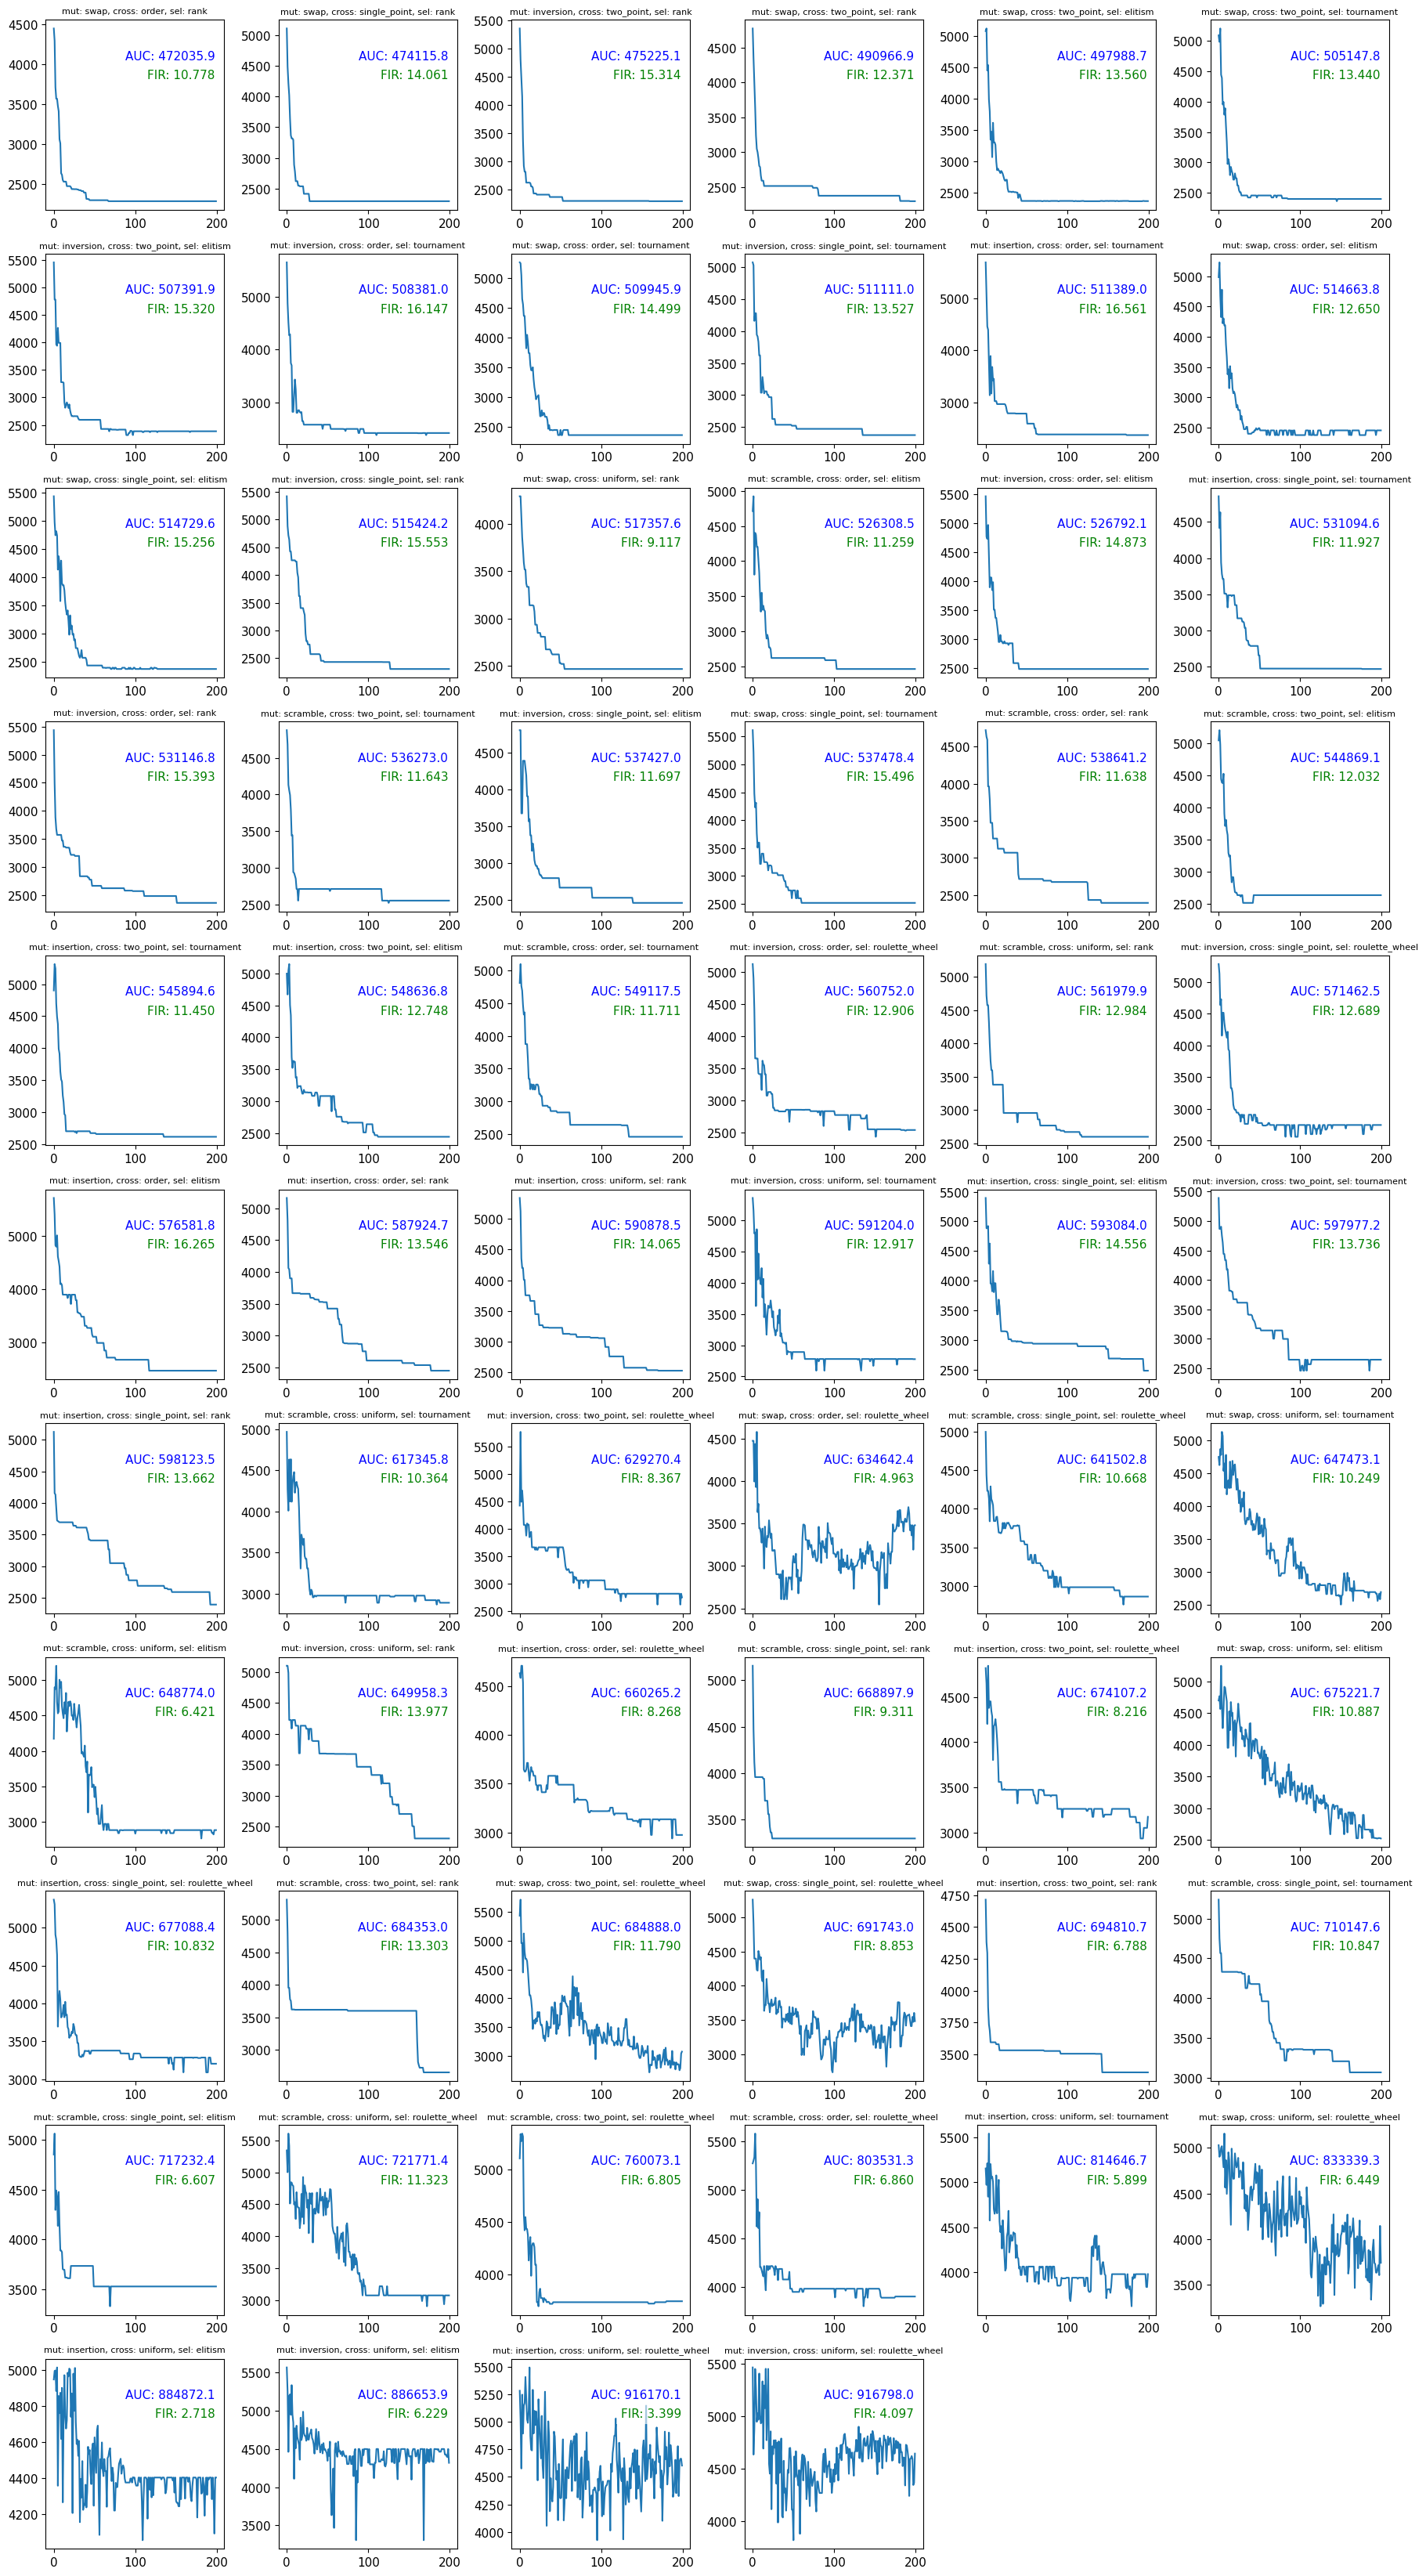

In [13]:
plot_fitness_grid(distance_matrix)